<a href="https://colab.research.google.com/github/fire-long/boaz-git-test/blob/main/Viz3Proj230601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
os.getcwd()

'/content/drive/MyDrive/boaz/Base203rdViz'

In [20]:
cd /content/drive/MyDrive/boaz/Base203rdViz

/content/drive/MyDrive/boaz/Base203rdViz


In [21]:
import pandas as pd
df = pd.read_csv('title_list.csv')

In [22]:
df.head(2)

,날짜,제목
0,2022.10.30.,이승엽의 행복한 고민…'로하스 가세' 두산 외야는 전쟁이다
1,2022.10.24.,훈련 지켜보는 이승엽 감독


In [23]:
df.shape

(800, 2)

In [24]:
#[포토], [사진]이 있는 행 drop
df = df[~df['제목'].str.contains('\[포토\]|\[사진\]')]
df.shape

(698, 2)

In [25]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df.head()

,날짜,제목
0,2022.10.30.,이승엽의 행복한 고민…'로하스 가세' 두산 외야는 전쟁이다
1,2022.10.24.,훈련 지켜보는 이승엽 감독
2,2022.10.31.,"“장점 많다, 더 독해져라” 이승엽 감독의 주문…미완의 32세 거포 깨어날까"
3,2022.10.29.,"‘최강야구’ 이승엽, 김선우 교체 생각 보류 “준비 많이 했네”[MK★TV컷]"
4,2022.10.26.,"‘MLB 경력’ 타자 로하스, 이승엽 감독의 첫 외국인 선수"


# 불용어 제거 및 토크나이저, 단어빈도수 확인

In [26]:
#특수문자 제거
df['제목'] = df['제목'].str.replace('[^&a-zA-Z0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]',' ', regex=True) 
df['제목']

0                  이승엽의 행복한 고민  로하스 가세  두산 외야는 전쟁이다
1                                    훈련 지켜보는 이승엽 감독
2         장점 많다  더 독해져라  이승엽 감독의 주문 미완의 32세 거포 깨어날까
3        최강야구  이승엽  김선우 교체 생각 보류  준비 많이 했네  MK TV컷 
4                  MLB 경력  타자 로하스  이승엽 감독의 첫 외국인 선수
                           ...                     
693                     MD포토  이승엽 감독  김재호  난 널 믿었어 
694                       MD포토  이승엽 감독에게 꽃다발 받는 장원준
695     IS 승장  이승엽 감독  이원재 좋은 경험 해   모든 타자들 타격 좋았다 
696       완전체 되나 했는데 반복된 두산의  딜런 리스크   이승엽 감독은 속 탄다
697            두산 이승엽  김강률 2군으로   1군 데뷔  김호준 제구 기대 
Name: 제목, Length: 698, dtype: object

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#제목 열의 값을 tokenizer 적용해서 단어로 분리함
tokens = [word_tokenize(title) for title in df['제목']]
#단어별 빈도수 계산
word_freq = FreqDist([word for sublist in tokens for word in sublist])

In [29]:
word_freq.most_common()

[('이승엽', 532),
 ('감독', 356),
 ('두산', 155),
 ('최강야구', 47),
 ('감독의', 43),
 ('첫', 40),
 ('양의지', 38),
 ('삼성', 36),
 ('감독이', 30),
 ('김성근', 28),
 ('박진만', 23),
 ('이승엽의', 21),
 ('경기', 21),
 ('감독님', 19),
 ('장원준', 18),
 ('초보', 18),
 ('포수', 18),
 ('이승엽이', 17),
 ('것', 15),
 ('더', 14),
 ('감독과', 14),
 ('MK포토', 14),
 ('선발', 14),
 ('우승', 13),
 ('한', 13),
 ('승리', 13),
 ('지켜보는', 12),
 ('IS', 12),
 ('국민타자', 12),
 ('좋은', 12),
 ('선물', 12),
 ('시드니', 12),
 ('인터뷰', 11),
 ('베어스', 11),
 ('KBO', 11),
 ('LG', 11),
 ('투수', 11),
 ('대구', 11),
 ('거포', 10),
 ('없다', 10),
 ('안', 10),
 ('이대호', 10),
 ('야구', 10),
 ('사령탑', 10),
 ('WBC', 10),
 ('수', 9),
 ('감독으로', 9),
 ('FA', 9),
 ('만난', 9),
 ('이승엽도', 9),
 ('SSG', 9),
 ('큰', 9),
 ('KIA', 9),
 ('1군', 9),
 ('4연패', 9),
 ('이', 8),
 ('이유', 8),
 ('기회', 8),
 ('레전드', 8),
 ('미소', 8),
 ('새', 8),
 ('감독에', 8),
 ('복귀', 8),
 ('김재환', 8),
 ('기대', 8),
 ('감독은', 8),
 ('감독에게', 8),
 ('염경엽', 8),
 ('ST포토', 8),
 ('종합', 8),
 ('홈런', 8),
 ('감독도', 8),
 ('구자욱', 8),
 ('130승', 8),
 ('고민', 7),
 ('위해', 7),
 

In [30]:
from konlpy.tag import Okt
from collections import Counter
from tqdm import tqdm
import re

# 형태소 분석기 초기화
okt = Okt()

word_freq = Counter()

for i in tqdm(range(len(df))):
    sentence = df.loc[i, '제목']
    
    # 영어와 문장 부호 제외한 한글 추출
    pattern = re.compile('[^a-zA-Z가-힣]')
    sentence = re.sub(pattern, '', sentence)
    
    # 형태소 분석 및 품사 태깅
    morphs = okt.pos(sentence)
    
    # 조사를 제외한 명사 추출
    words = [word for word, pos in morphs if pos.startswith('N') and not word.endswith('조사')]
    
    # 단어 빈도수 계산
    word_freq.update(words)

# 단어별 빈도수 출력
print(word_freq.most_common())

100%|██████████| 698/698 [00:09<00:00, 76.47it/s]

[('이승엽', 609), ('감독', 525), ('두산', 163), ('최강', 56), ('양의지', 42), ('야구', 38), ('삼성', 32), ('김성근', 32), ('포토', 32), ('타자', 31), ('홈런', 26), ('선수', 24), ('박진만', 24), ('경기', 24), ('장원준', 23), ('승', 22), ('포수', 22), ('선발', 21), ('초보', 20), ('년', 20), ('국민', 20), ('연패', 19), ('팀', 17), ('승리', 16), ('투수', 16), ('인터뷰', 15), ('선물', 15), ('훈련', 14), ('우승', 14), ('최고', 14), ('시드니', 14), ('캠프', 13), ('잠실', 13), ('더', 12), ('코치', 12), ('시즌', 12), ('시작', 11), ('리그', 11), ('사령탑', 11), ('대결', 11), ('거포', 10), ('준비', 10), ('위기', 10), ('레전드', 10), ('이대호', 10), ('팬', 10), ('부활', 10), ('김유성', 10), ('고민', 9), ('프로', 9), ('미소', 9), ('위', 9), ('평가', 9), ('복귀', 9), ('최', 9), ('신인', 9), ('불펜', 9), ('박용택', 9), ('대구', 9), ('재건', 9), ('로하스', 8), ('이유', 8), ('기회', 8), ('타격', 8), ('인천', 8), ('눈', 8), ('김재환', 8), ('합류', 8), ('염경엽', 8), ('종합', 8), ('곰', 8), ('팍', 8), ('친정', 8), ('연승', 8), ('베어스', 8), ('호주', 8), ('프로야구', 8), ('구자욱', 8), ('등', 7), ('트레이드', 7), ('왕조', 7), ('위해', 7), ('두산베어스', 7), ('감사', 7), ('예고', 7), 

# 용언을 어간으로 추출해서 빈도수 출력

In [31]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()
verb_stems = Counter()

for i in tqdm(range(len(df))):
    sentence = df.loc[i, '제목']
    words = okt.pos(sentence)

    for word, pos in words:
       # 명사와 용언만 추출
       if pos in ['Noun', 'Verb']:
           word_freq[word] += 1

# 명사와 용언 빈도수 출력
print(word_freq.most_common())

100%|██████████| 698/698 [00:02<00:00, 306.13it/s]

[('이승엽', 1218), ('감독', 1054), ('두산', 343), ('최강', 112), ('야구', 111), ('양의지', 86), ('삼성', 83), ('김성근', 64), ('포토', 64), ('타자', 63), ('경기', 55), ('홈런', 53), ('선수', 52), ('승', 49), ('박진만', 48), ('첫', 48), ('장원준', 46), ('포수', 46), ('선발', 45), ('초보', 40), ('국민', 40), ('연패', 38), ('팀', 34), ('투수', 33), ('승리', 32), ('선물', 31), ('인터뷰', 30), ('우승', 29), ('훈련', 28), ('최고', 28), ('시드니', 28), ('하는', 27), ('더', 26), ('캠프', 26), ('잠실', 26), ('코치', 24), ('군', 24), ('대구', 24), ('사령탑', 23), ('대결', 23), ('시작', 22), ('리그', 22), ('시즌', 22), ('위', 21), ('팬', 21), ('베어스', 21), ('거포', 20), ('준비', 20), ('위기', 20), ('레전드', 20), ('이대호', 20), ('년', 20), ('부활', 20), ('최', 20), ('안', 20), ('것', 20), ('김유성', 20), ('미소', 19), ('연승', 19), ('앞', 19), ('고민', 18), ('이유', 18), ('평가', 18), ('복귀', 18), ('신인', 18), ('불펜', 18), ('박용택', 18), ('재건', 18), ('프로', 17), ('기회', 17), ('기대', 17), ('곰', 17), ('로하스', 16), ('타격', 16), ('인천', 16), ('김재환', 16), ('합류', 16), ('염경엽', 16), ('종합', 16), ('팍', 16), ('친정', 16), ('호주', 16), ('프로야구

# 워드클라우드 

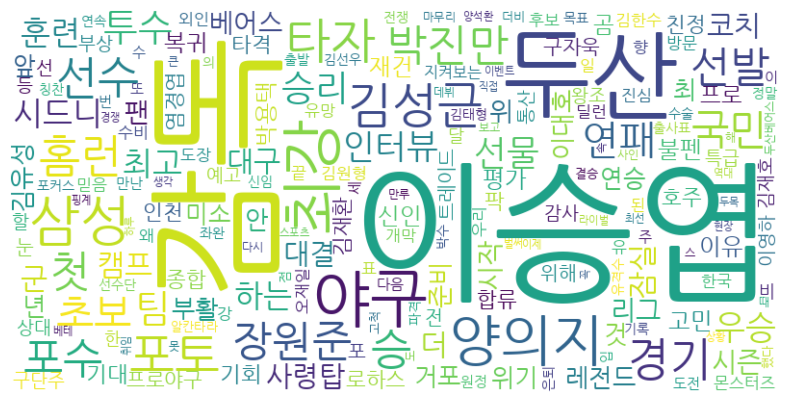

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 워드클라우드 생성을 위한 데이터 전처리
word_freq_selected = {word: freq for word, freq in word_freq.items()}

# 한글 폰트 파일 경로
font_file = 'NanumGothic.ttf'  # 원하는 한글 폰트 파일의 경로로 변경

# 워드클라우드에 사용할 폰트 설정
fontprop = fm.FontProperties(fname=font_file)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_file).generate_from_frequencies(word_freq_selected)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 이미지 파일로 저장
output_file = '이승엽감독.png'
plt.savefig(output_file, bbox_inches = 'tight')

plt.show()